In [1]:
#https://github.com/sy2399/DeepLearningZeroToAll
!pip install -r requirements.txt

     |████████████████████████████████| 61kB 217kB/s eta 0:00:01
     |████████████████████████████████| 307kB 720kB/s eta 0:00:01
     |████████████████████████████████| 51kB 4.9MB/s  eta 0:00:01
     |████████████████████████████████| 215kB 14.8MB/s eta 0:00:01
     |████████████████████████████████| 225kB 14.5MB/s eta 0:00:01


 X 와 Y 의 상관관계를 분석하는 기초적인 선형 회귀 모델


In [1]:
# X 와 Y 의 상관관계를 분석하는 기초적인 선형 회귀 모델을 만들고 실행해봅니다.
import tensorflow as tf


//anaconda2/envs/tensorflow/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]


W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))


In [3]:

# name: 나중에 텐서보드등으로 값의 변화를 추적하거나 살펴보기 쉽게 하기 위해 이름을 붙여줍니다.
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")
print(X)
print(Y)

Tensor("X:0", dtype=float32)
Tensor("Y:0", dtype=float32)


In [4]:

# X 와 Y 의 상관 관계를 분석하기 위한 가설 수식을 작성합니다.
# y = W * x + b
# W 와 X 가 행렬이 아니므로 tf.matmul 이 아니라 기본 곱셈 기호를 사용했습니다.

hypothesis = W * X + b


In [18]:
# 최적화를 통해 손실값이 적어지는 W, b 를 찾는 것이 목표

# 손실 함수를 작성합니다.
# mean(h - Y)^2 : 예측값과 실제값의 거리를 비용(손실) 함수로 정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 경사 하강법 최적화를 수행합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

"""
tf.train.GradientDescentOptimizer 작동 방식

"""
# 비용을 최소화 하는 것이 최종 목표
train_op = optimizer.minimize(cost)

In [19]:
# 세션을 생성하고 초기화합니다.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # 최적화를 100번 수행합니다.
    for step in range(100):
        # sess.run 을 통해 train_op 와 cost 그래프를 계산합니다.
        # 이 때, 가설 수식에 넣어야 할 실제값을 feed_dict 을 통해 전달합니다.
        
        #sess.run([train_op, cost]) : 
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})

        print(step, cost_val, sess.run(W), sess.run(b))

    # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인해봅니다.
    print("\n=== Test ===")
    print("X: 5, Y:", sess.run(hypothesis, feed_dict={X: 5}))
    print("X: 2.5, Y:", sess.run(hypothesis, feed_dict={X: 2.5}))


0 21.811106 [1.2766397] [-0.09067428]
1 0.2650232 [1.0547123] [-0.18319531]
2 0.0074377437 [1.0769256] [-0.16844116]
3 0.004157901 [1.0725049] [-0.16552319]
4 0.00392543 [1.071043] [-0.1614205]
5 0.0037385563 [1.0693045] [-0.1575536]
6 0.0035609712 [1.0676417] [-0.15376467]
7 0.0033918228 [1.0660154] [-0.15006842]
8 0.0032307096 [1.0644283] [-0.14646088]
9 0.0030772525 [1.0628796] [-0.14294004]
10 0.002931077 [1.061368] [-0.13950387]
11 0.0027918443 [1.0598928] [-0.13615029]
12 0.0026592358 [1.058453] [-0.13287735]
13 0.0025329157 [1.0570478] [-0.12968306]
14 0.0024126053 [1.0556765] [-0.12656559]
15 0.0022980005 [1.054338] [-0.12352305]
16 0.002188848 [1.0530317] [-0.12055364]
17 0.0020848704 [1.0517569] [-0.11765558]
18 0.0019858412 [1.0505127] [-0.11482721]
19 0.0018915096 [1.0492984] [-0.11206684]
20 0.00180167 [1.0481132] [-0.10937284]
21 0.0017160801 [1.0469567] [-0.10674355]
22 0.0016345702 [1.0458279] [-0.1041775]
23 0.0015569228 [1.0447261] [-0.10167316]
24 0.0014829674 [1.043

# Linear Regression - Minimizing Cost

## Hypothesis H(x) = Wx ,   Cost(W)

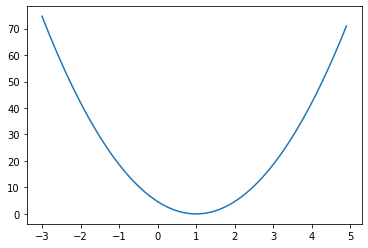

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1,2,3]
Y = [1,2,3]

W = tf.placeholder(tf.float32)
# Hypothesis : X*W
hypothesis = X * W

# Cost(Loss) function
cost = tf.reduce_mean(tf.square(hypothesis-Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer()) 

W_val = []
cost_val = []

for i in range(-30, 50):
    feed_W = i*0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W:feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
plt.plot(W_val, cost_val) #X축 : W, y축 : cost

## plot : Convex function --> Gradient Boosting 알고리즘을 적용하기에 적합

## Gradient Descent

- Minimize cost using derivatice
- W는 그래프의 각 점의 미분값에서  

alpha : 학습 rate (learning rate)


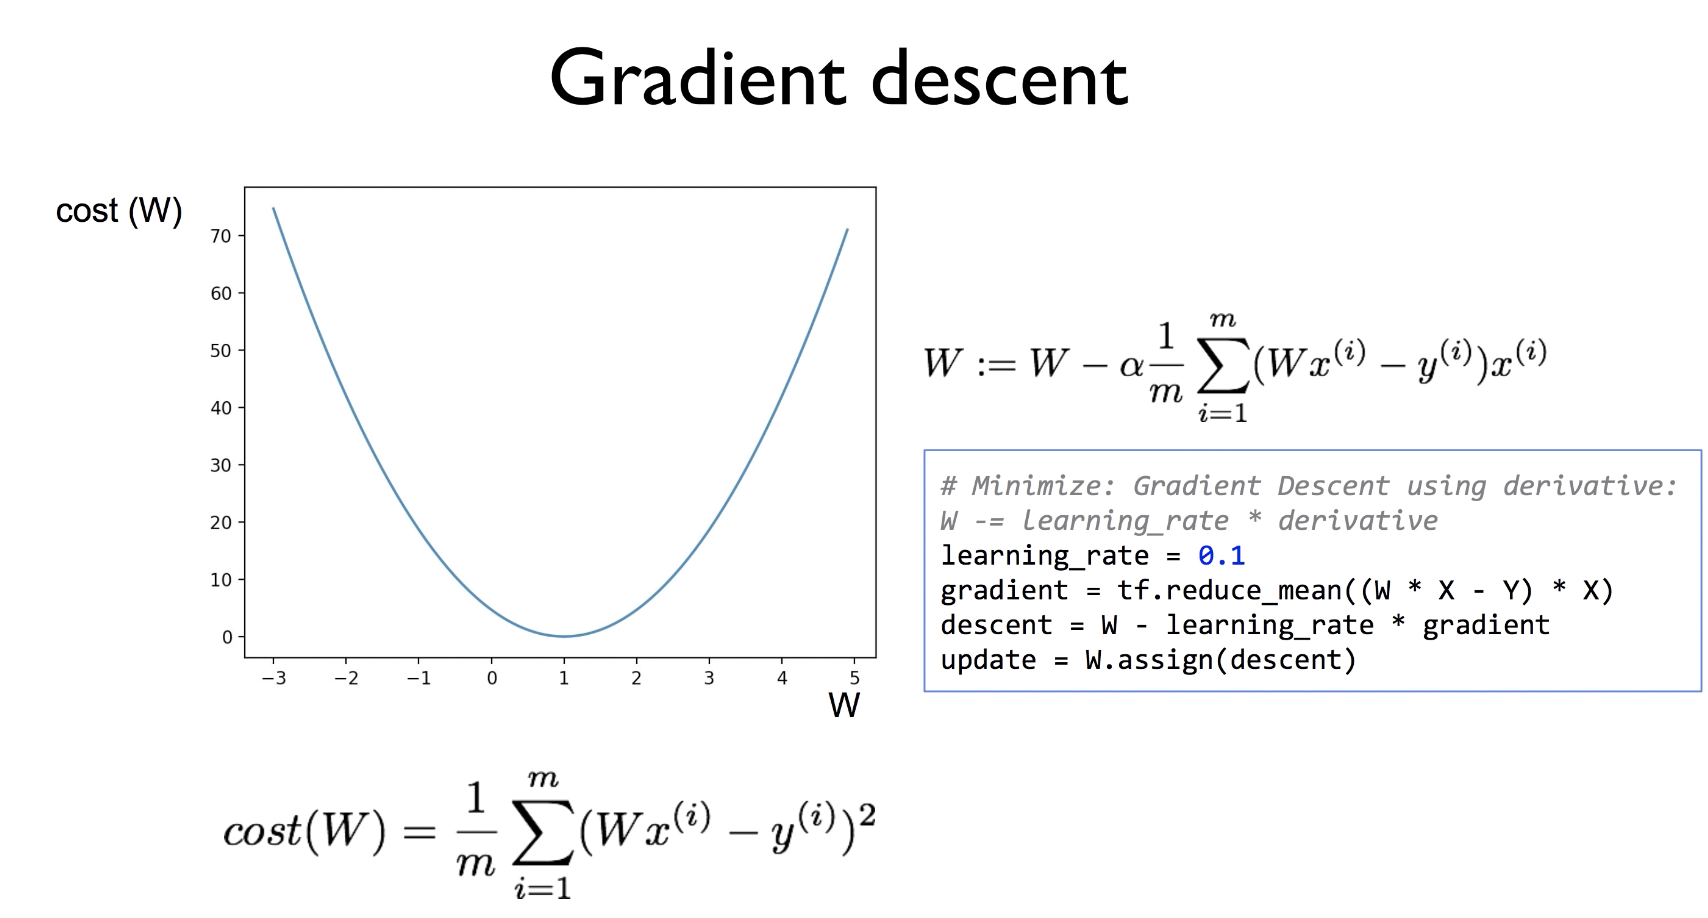

In [7]:
from IPython.display import Image
 
Image("img/TF_GradientDescent.png") # code안에서 나오게 할 때

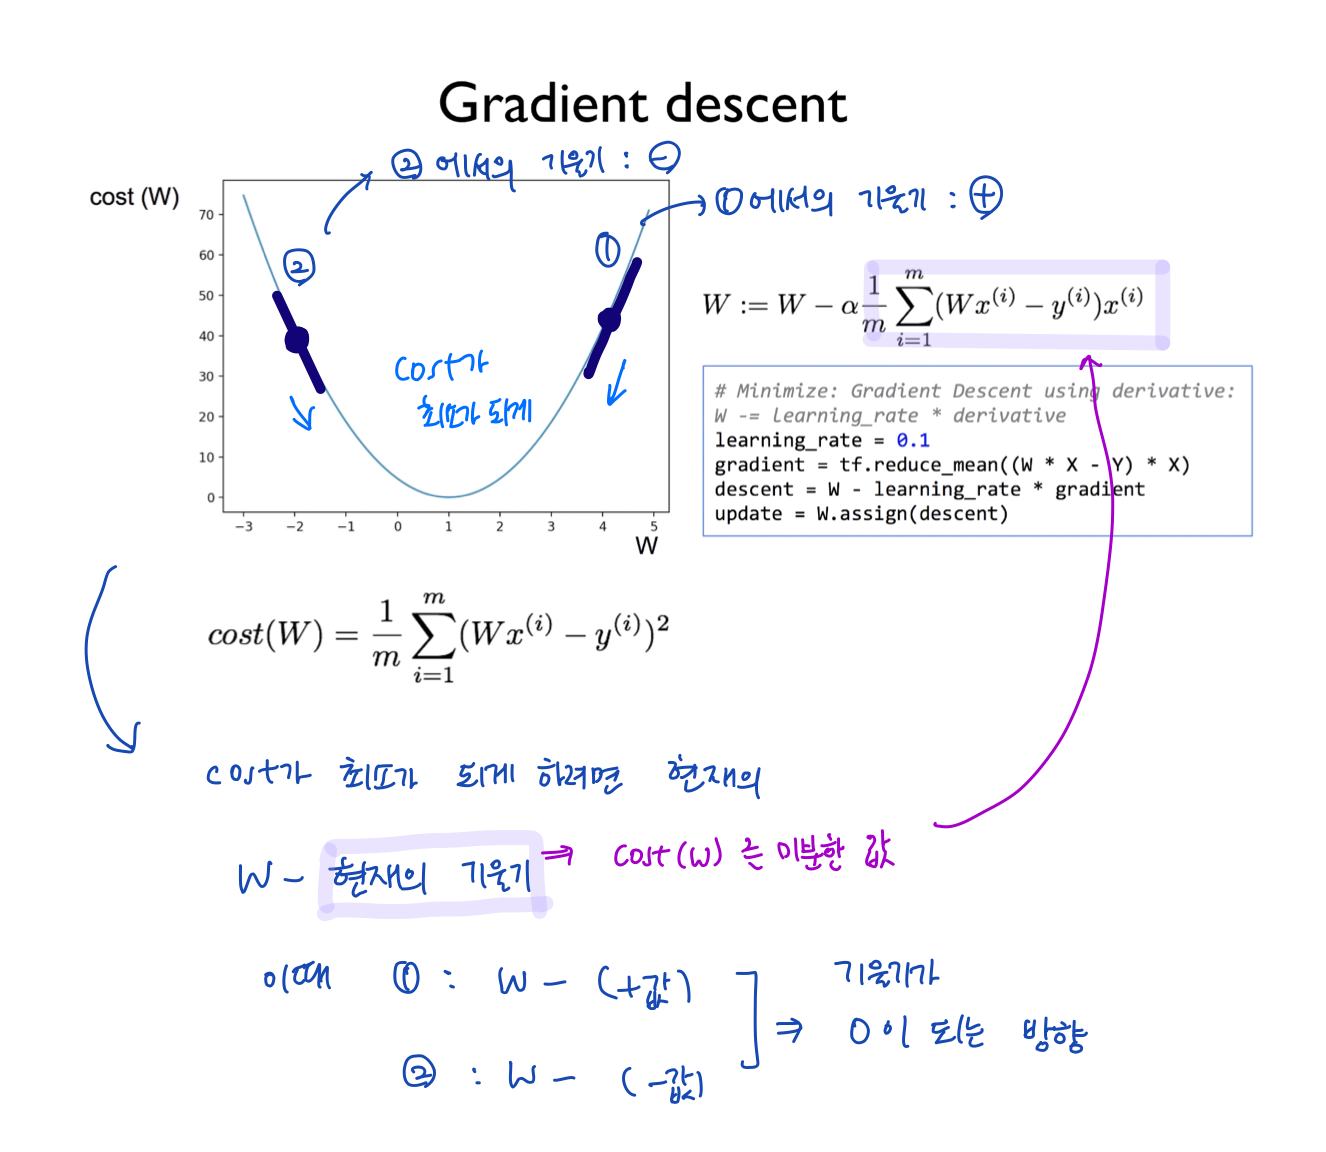

In [10]:
Image("img/TF_GradientDescent_Add.png") # code안에서 나오게 할 때

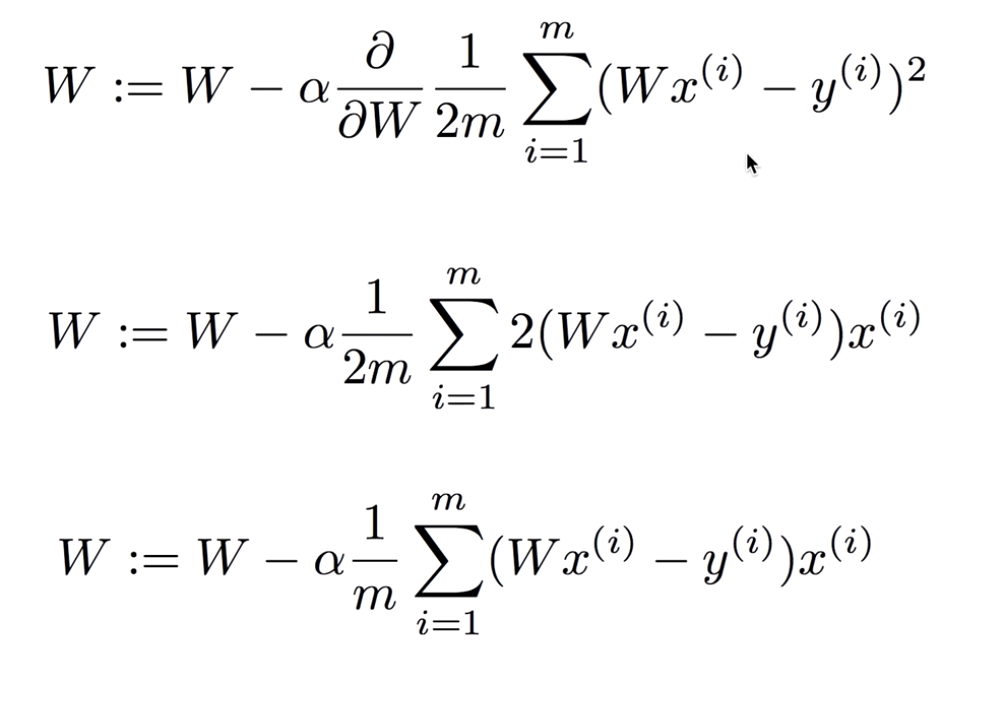

In [27]:
Image("img/TF_GD_formula.png") # code안에서 나오게 할 때

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

x_data = [1,2,3]
y_data = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Hypothesis : X*W
hypothesis = X * W

# Cost(Loss) function
cost = tf.reduce_mean(tf.square(hypothesis-Y))

W_val = []
cost_val = []

# Minimize cost : Gradient Descent using derivatice 
### --> optimizer = tf.train
# W -= Learning rate * derivative
# derivative (기울기) = reduce_mean((W * X -Y) * X)
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient #새로운 W 값
update = W.assign(descent) # tensor에서는 = 로 assign 불가. update 라는 연산이 필요

sess = tf.Session()
sess.run(tf.global_variables_initializer()) 

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y : y_data})
    print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))
## plot : Convex function --> Gradient Boosting 알고리즘을 적용하기에 적합

0 3.532278 [0.1299904]
1 1.0047368 [0.5359949]
2 0.28579187 [0.7525306]
3 0.0812919 [0.8680163]
4 0.023123046 [0.9296087]
5 0.0065772124 [0.962458]
6 0.0018708488 [0.9799776]
7 0.00053215184 [0.9893214]
8 0.00015136466 [0.9943048]
9 4.305522e-05 [0.99696255]
10 1.22469255e-05 [0.99838]
11 3.4838813e-06 [0.999136]
12 9.908645e-07 [0.9995392]
13 2.818049e-07 [0.99975425]
14 8.0155395e-08 [0.9998689]
15 2.2820316e-08 [0.9999301]
16 6.5059425e-09 [0.9999627]
17 1.8447821e-09 [0.9999801]
18 5.278338e-10 [0.9999894]
19 1.4895463e-10 [0.99999434]
20 4.2761645e-11 [0.99999696]


-  Minimize cost : Gradient Descent using derivatice 
> optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
> train = optimizer.minimize(cost)

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt


W = tf.Variable(5.)
X = [1,2,3]
Y = [1,2,3]

# Hypothesis : X*W
hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10):
    print(step, sess.run(W))
    sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0


In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt


W = tf.Variable(5.)
X = [1,2,3]
Y = [1,2,3]

# Hypothesis : X*W
hypothesis = X * W

#Manual gradient 
gradient = tf.reduce_mean((W * X - Y) * X) *2

# Cost(Loss) function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Get gradient
gvs = optimizer.compute_gradients(cost)

# apply_gradients
apply = optimizer.apply_gradients(gvs)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply)


TypeError: Fetch argument None has invalid type <class 'NoneType'>

In [13]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# Try to find values for W and b to compute y_data = x_data * W + b
# We know that W should be 1 and b should be 0
# But let TensorFlow figure it out
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Our hypothesis XW+b
hypothesis = x_train * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    # Fit the line
    for step in range(2001):
        _, cost_val, W_val, b_val = sess.run([train, cost, W, b])

        if step % 20 == 0:
            print(step, cost_val, W_val, b_val)

0 21.682138 [-1.319389] [0.94657683]
20 0.54858583 [0.15730132] [1.5037392]
40 0.324666 [0.3271353] [1.4903576]
60 0.29329327 [0.37115788] [1.4257714]
80 0.26635942 [0.4018919] [1.3592849]
100 0.24191172 [0.43011314] [1.295453]
120 0.21970804 [0.4569064] [1.2345761]
140 0.19954242 [0.48243085] [1.1765561]
160 0.18122756 [0.5067548] [1.1212621]
180 0.1645938 [0.5299356] [1.0685672]
200 0.14948677 [0.55202675] [1.0183486]
220 0.13576628 [0.5730799] [0.97049]
240 0.12330515 [0.5931435] [0.92488056]
260 0.11198773 [0.6122642] [0.8814146]
280 0.101708986 [0.6304864] [0.8399912]
300 0.09237379 [0.6478522] [0.80051476]
320 0.08389533 [0.66440177] [0.76289356]
340 0.07619507 [0.68017364] [0.7270404]
360 0.069201596 [0.6952044] [0.69287217]
380 0.06284998 [0.7095286] [0.6603097]
400 0.057081383 [0.7231797] [0.6292775]
420 0.051842157 [0.73618937] [0.5997036]
440 0.047083884 [0.74858755] [0.5715197]
460 0.04276238 [0.760403] [0.5446604]
480 0.03883745 [0.7716631] [0.51906335]
500 0.035272803 [0.

# Multi-variable Linear Regression

In [2]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]

y_data = [152., 185., 180., 196., 142.]

# placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize. Need a very small learning rate for this data set
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  62547.29 
Prediction:
 [-75.96345  -78.27629  -83.83015  -90.80436  -56.976482]
10 Cost:  14.468626 
Prediction:
 [145.26407 187.59541 178.152   194.48586 145.81136]
20 Cost:  13.822504 
Prediction:
 [145.9478  188.39003 178.94907 195.3521  146.41212]
30 Cost:  13.749193 
Prediction:
 [145.96422 188.38263 178.95592 195.35777 146.4012 ]
40 Cost:  13.67629 
Prediction:
 [145.97856 188.3728  178.96031 195.36082 146.38844]
50 Cost:  13.603815 
Prediction:
 [145.99286 188.36302 178.9647  195.36386 146.37572]
60 Cost:  13.531695 
Prediction:
 [146.00711 188.35324 178.9691  195.3669  146.36302]
70 Cost:  13.459941 
Prediction:
 [146.02135 188.34352 178.9735  195.36995 146.35036]
80 Cost:  13.388664 
Prediction:
 [146.03552 188.33382 178.97784 195.37292 146.33774]
90 Cost:  13.317709 
Prediction:
 [146.04967 188.32413 178.98221 195.37595 146.32515]
100 Cost:  13.247167 
Prediction:
 [146.06377 188.31447 178.98654 195.37894 146.31259]
110 Cost:  13.176931 
Prediction:
 [146.07785 188.3

1200 Cost:  7.415207 
Prediction:
 [147.4048  187.39668 179.39937 195.66235 145.12111]
1210 Cost:  7.37655 
Prediction:
 [147.41525 187.38954 179.40259 195.66454 145.11183]
1220 Cost:  7.338075 
Prediction:
 [147.42567 187.3824  179.40579 195.66673 145.10257]
1230 Cost:  7.299817 
Prediction:
 [147.43608 187.37529 179.40901 195.6689  145.09335]
1240 Cost:  7.261752 
Prediction:
 [147.44646 187.3682  179.41222 195.6711  145.08415]
1250 Cost:  7.223896 
Prediction:
 [147.4568  187.3611  179.41539 195.67325 145.07498]
1260 Cost:  7.186277 
Prediction:
 [147.46712 187.35405 179.41856 195.67542 145.06584]
1270 Cost:  7.148805 
Prediction:
 [147.47742 187.347   179.42174 195.67758 145.05672]
1280 Cost:  7.111567 
Prediction:
 [147.48767 187.33998 179.42491 195.67973 145.0476 ]
1290 Cost:  7.0745363 
Prediction:
 [147.49791 187.33298 179.42805 195.68187 145.03854]
1300 Cost:  7.037703 
Prediction:
 [147.50812 187.326   179.43121 195.684   145.0295 ]
1310 Cost:  7.0010633 
Prediction:
 [147.51

- Matrix

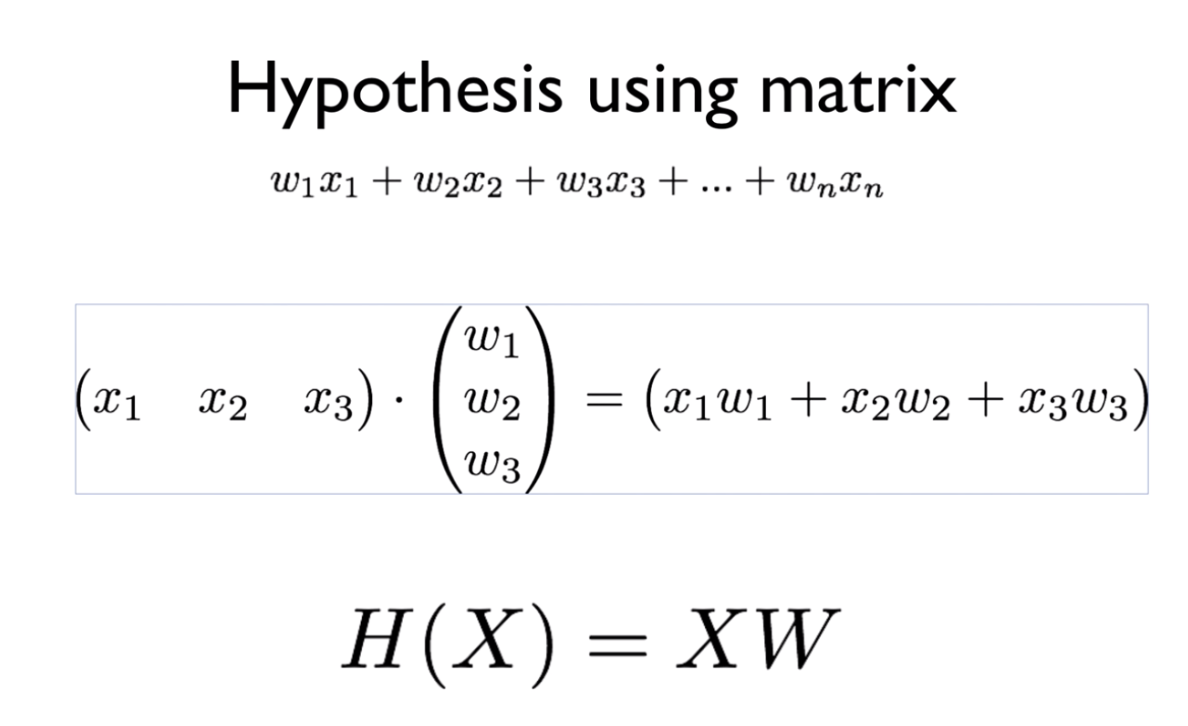

In [3]:
from IPython.display import Image
 
Image("img/TF_Matmul.png") # code안에서 나오게 할 때

In [ ]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]


# placeholders for a tensor that will be always fed.

#### shape = [None, 3] --> N개의 x 데이터, 3차원
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)
